In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline    
# matplotlib inline is for visuaizing in the notebook itself

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

from sklearn.metrics import r2_score

# for OLS ordinary least square
import statsmodels.api as sm

In [2]:
df=pd.read_csv('Dataset/height_weight.csv')

In [3]:
df.head()

,Height,Weight
0,120,45
1,135,58
2,123,48
3,145,60
4,160,70


Text(0, 0.5, 'Height')

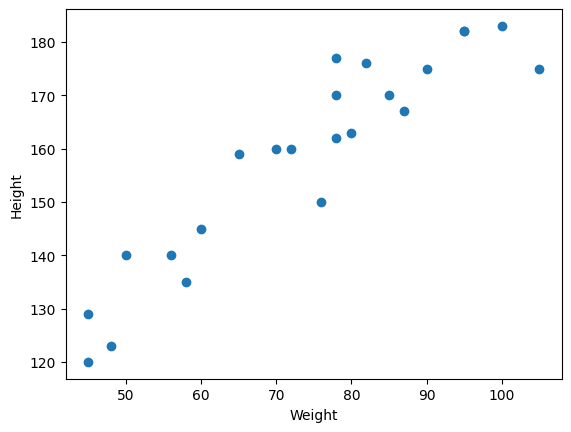

In [4]:
## Scatter
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [5]:
## find correlation
df.corr()

,Height,Weight
Height,1.000000,0.931142
Weight,0.931142,1.000000


In [6]:
## Seaborn
import seaborn as sns

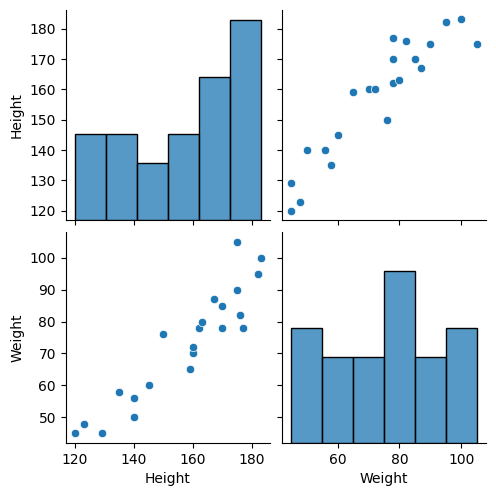

In [7]:
sns.pairplot(df)

In [8]:
## independent Feature and Dependent feature
X = df['Weight'] 
print(type(X))
print(np.array(X).shape)
X = df[['Weight']]  ## independent feature should be data frame or 2-D array
print(type(X))
print(np.array(X).shape)

y=df['Height'] ## dependent feature should be in series or 1-D array

<class 'pandas.core.series.Series'>
(23,)
<class 'pandas.core.frame.DataFrame'>
(23, 1)


In [9]:
## split train test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
# randomly one can select train and test datapoints, 
# if random_state is given it will choose the same train and test datapoints for everyone

In [10]:
print(X_train.shape)
print(y_train.shape)

(17, 1)
(17,)


In [11]:
## Standardization    
# We do this because for bigger values it will take time to find global minima
# We take each independent feature and apply 'Z_Score' formula. 
# After applying formula our mean converts to 0 and 
#   standard deviation converts to 1

scaler = StandardScaler()
X_train_stand = scaler.fit_transform(X_train)

For standardizeing training dataset we use fit_transform and in test dataset we use transform, because the same mean and standard deviation used for training data is used in test data aslo. If fit_transform is used there is a chance of data leakage(ie. model get idea of both train and test data)

In [12]:
X_test_stand = scaler.transform(X_test)

In [13]:
# Apply simple linear regression

regressor = LinearRegression(n_jobs=-1)
# njobs utlize number of core processors

In [14]:
X_train_stand=np.array(X_train_stand).reshape(-1,1)
X_test_stand=np.array(X_test_stand).reshape(-1,1)

In [15]:
regressor.fit(X_train_stand,y_train)

LinearRegression(n_jobs=-1)

In [16]:
# print the coefficient beta_1, here there is only 1 independent feature
print("Coefficent or slope : ",regressor.coef_)
# print intercept
print("Intercept : ",regressor.intercept_)

Coefficent or slope :  [17.2982057]
Intercept :  156.47058823529412


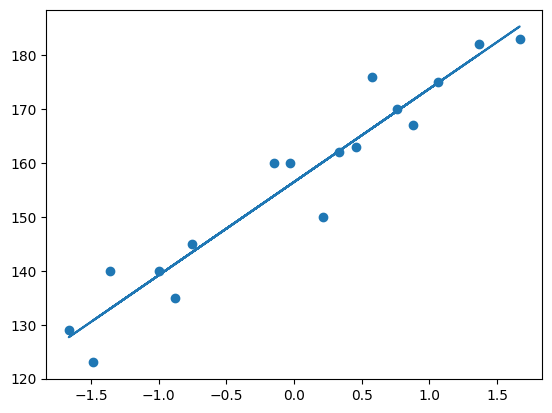

In [17]:
## plot Training data plot best fit line
plt.scatter(X_train_stand,y_train)
plt.plot(X_train_stand,regressor.predict(X_train_stand))

In [18]:
## Prediction for test data
y_pred = regressor.predict(X_test_stand)

In [19]:
print(y_test)
print(y_pred)

15    177
9     170
0     120
8     182
17    159
12    175
Name: Height, dtype: int64
[162.26499721 162.26499721 127.68347133 180.07972266 148.64197186
 190.55897293]


In [20]:
print(X_train)
print("---")
print(y_train)
print("---")
print(X_test)
print("---")
print(y_test)
print("---")
print(y_pred)

    Weight
1       58
13     100
5       78
2       48
11      95
20      45
3       60
4       70
18      76
16      50
21      56
22      72
7       90
10      82
14      85
19      87
6       80
---
1     135
13    183
5     162
2     123
11    182
20    129
3     145
4     160
18    150
16    140
21    140
22    160
7     175
10    176
14    170
19    167
6     163
Name: Height, dtype: int64
---
    Weight
15      78
9       78
0       45
8       95
17      65
12     105
---
15    177
9     170
0     120
8     182
17    159
12    175
Name: Height, dtype: int64
---
[162.26499721 162.26499721 127.68347133 180.07972266 148.64197186
 190.55897293]


In [21]:
## Performance Metrices
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
rmsee = np.sqrt(mse)
print("mse: ", mse," mae: ",mae," rmse: ",rmse, " another rmse method: ",rmsee)

mse:  114.84069295228699  mae:  9.665125886795005  rmse:  10.716374991212605  another rmse method:  10.716374991212605


In [22]:
## R_Square
score = r2_score(y_test,y_pred)
print(score)

0.7360826717981276


In [23]:
## Adjusted R_Square
print("N = no. of datapoints: ",len(y_test))
print(X_test_stand.shape)
print("P = no. of independent feature: ",X_test_stand.shape[1])
adj_r_square = 1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test_stand.shape[1]-1)
adj_r_square

N = no. of datapoints:  6
(6, 1)
P = no. of independent feature:  1


0.6701033397476595

In [24]:
## OLS linear regression

model = sm.OLS(y_train,X_train_stand).fit()

In [25]:
prediction = model.predict(X_test_stand)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [26]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Tue, 02 Jul 2024   Prob (F-statistic):                       0.664
Time:                        15:00:31   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/home/kali/JosephKB/ML_NLP/KrishNaikUdemy/ML_NLP_Learning_Codes/venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


IN OLS and above cell 15 we get same coeffcient as "15.8"

In [27]:
## Prediction of new data

print(regressor.predict([[72]]))

# we need to do standardaisation

regressor.predict(scaler.transform([[72]]))

[1401.94139895]


/home/kali/JosephKB/ML_NLP/KrishNaikUdemy/ML_NLP_Learning_Codes/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])